In [1]:
! pip install snownlp
! pip install langid
! pip install googletrans==4.0.0rc1
! pip install emoji
! pip install pyspellchecker


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from googletrans import Translator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import emoji
from spellchecker import SpellChecker
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Chan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
sid = SentimentIntensityAnalyzer()

In [4]:
df = pd.read_csv('NLP dataset.csv')

In [5]:
df['Label'].value_counts()

Positive    60
Neutral     38
Negative    36
Name: Label, dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
sid.polarity_scores(df.iloc[1]['Review'])

{'neg': 0.0, 'neu': 0.447, 'pos': 0.553, 'compound': 0.872}

In [8]:
df['Scores'] = df['Review'].apply(lambda review: sid.polarity_scores(review))

In [9]:
df.head()

,Review,Label,Scores
0,Barang sudah sampai.tp foto tak Ada sangkutan....,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Fast penghantaran and good service good respon...,Positive,"{'neg': 0.0, 'neu': 0.447, 'pos': 0.553, 'comp..."
2,Good price good product quality good job good ...,Positive,"{'neg': 0.0, 'neu': 0.296, 'pos': 0.704, 'comp..."
3,penantian yang berbaloi..kasut yang beautiful ...,Negative,"{'neg': 0.185, 'neu': 0.548, 'pos': 0.267, 'co..."
4,Penghantaran cepat walaupun dari China. 7 hari...,Positive,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp..."


In [10]:
df['Compound'] = df['Scores'].apply(lambda d:d['compound'])

In [11]:
df.head()

,Review,Label,Scores,Compound
0,Barang sudah sampai.tp foto tak Ada sangkutan....,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Fast penghantaran and good service good respon...,Positive,"{'neg': 0.0, 'neu': 0.447, 'pos': 0.553, 'comp...",0.8720
2,Good price good product quality good job good ...,Positive,"{'neg': 0.0, 'neu': 0.296, 'pos': 0.704, 'comp...",0.9753
3,penantian yang berbaloi..kasut yang beautiful ...,Negative,"{'neg': 0.185, 'neu': 0.548, 'pos': 0.267, 'co...",0.2955
4,Penghantaran cepat walaupun dari China. 7 hari...,Positive,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.8555


In [12]:
df['Comp_Score'] = df['Compound'].apply(lambda score: 'Positive' if score > 0.0 else ('Negative' if score < 0.0 else 'Neutral'))

In [13]:
df.head(100)

,Review,Label,Scores,Compound,Comp_Score
0,Barang sudah sampai.tp foto tak Ada sangkutan....,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,Fast penghantaran and good service good respon...,Positive,"{'neg': 0.0, 'neu': 0.447, 'pos': 0.553, 'comp...",0.8720,Positive
2,Good price good product quality good job good ...,Positive,"{'neg': 0.0, 'neu': 0.296, 'pos': 0.704, 'comp...",0.9753,Positive
3,penantian yang berbaloi..kasut yang beautiful ...,Negative,"{'neg': 0.185, 'neu': 0.548, 'pos': 0.267, 'co...",0.2955,Positive
4,Penghantaran cepat walaupun dari China. 7 hari...,Positive,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.8555,Positive
...,...,...,...,...,...
95,penghantaran sangat fast sekali.,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
96,kasut agak kecil... not comfortable,Negative,"{'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'comp...",-0.4023,Negative
97,Barang sampai dgn selamat..kasut tidak koyak d...,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
98,"Penghantaran yang pantas, harga baik, layanan ...",Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [14]:
# Function to translate text to English
def translate_text_function(text):

    def translate_to_english(text):
        translator = Translator()
        translation = translator.translate(text, src='ms', dest='en')
        return translation.text
    def auto_translate(text):
        translator = Translator()
        translation = translator.translate(text, dest='en')
        return translation.text
    auto_translated_text = auto_translate(text)
    malay_translated_text = translate_to_english(auto_translated_text)
    translated_sentence = f"{malay_translated_text}"

    return translated_sentence

In [15]:
# Translate the 'Review' column to English and add the translations to a new column 'Translated_Review'
df['Translated_Review'] = df['Review'].apply(translate_text_function)

In [16]:
df["Lowercase"] = df["Translated_Review"].str.lower()
df.head()

,Review,Label,Scores,Compound,Comp_Score,Translated_Review,Lowercase
0,Barang sudah sampai.tp foto tak Ada sangkutan....,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,The item has arrived.,the item has arrived.
1,Fast penghantaran and good service good respon...,Positive,"{'neg': 0.0, 'neu': 0.447, 'pos': 0.553, 'comp...",0.8720,Positive,Fast delivery and good service good response f...,fast delivery and good service good response f...
2,Good price good product quality good job good ...,Positive,"{'neg': 0.0, 'neu': 0.296, 'pos': 0.704, 'comp...",0.9753,Positive,Good Price Good Product Quality Good Job Good ...,good price good product quality good job good ...
3,penantian yang berbaloi..kasut yang beautiful ...,Negative,"{'neg': 0.185, 'neu': 0.548, 'pos': 0.267, 'co...",0.2955,Positive,Waiting that is in a place ... the case is bea...,waiting that is in a place ... the case is bea...
4,Penghantaran cepat walaupun dari China. 7 hari...,Positive,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.8555,Positive,Fast delivery even from China.7 days to arrive...,fast delivery even from china.7 days to arrive...


In [17]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [18]:
# Sample preprocessing for Malaysia Rojak language
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove non-alphabetic characters
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

df['preprocessed_text'] = df['Review'].apply(preprocess_text)

In [19]:
sid.polarity_scores("warna peach not pink color , awak menipu ")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset splitting
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Label'], test_size=0.2, random_state=42)

# Sample model training using CountVectorizer and Naive Bayes
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Sample evaluation
predictions = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, predictions))

Accuracy: 0.48148148148148145
              precision    recall  f1-score   support

    Negative       1.00      0.17      0.29         6
     Neutral       1.00      0.31      0.47        13
    Positive       0.36      1.00      0.53         8

    accuracy                           0.48        27
   macro avg       0.79      0.49      0.43        27
weighted avg       0.81      0.48      0.45        27



In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset splitting
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Label'], test_size=0.2, random_state=42)

# Transform the data using the selected features
tfidf_vectorizer = TfidfVectorizer()
X_train_selected = tfidf_vectorizer.fit_transform(X_train)
X_test_selected = tfidf_vectorizer.transform(X_test)

# Train a SVM classifier on the selected features
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_selected, y_train)

# Make predictions on the validation and test sets
svm_predictions = svm_model.predict(X_test_selected)

In [22]:
# Generate confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[ 1,  0,  5],
       [ 0,  3, 10],
       [ 0,  0,  8]], dtype=int64)

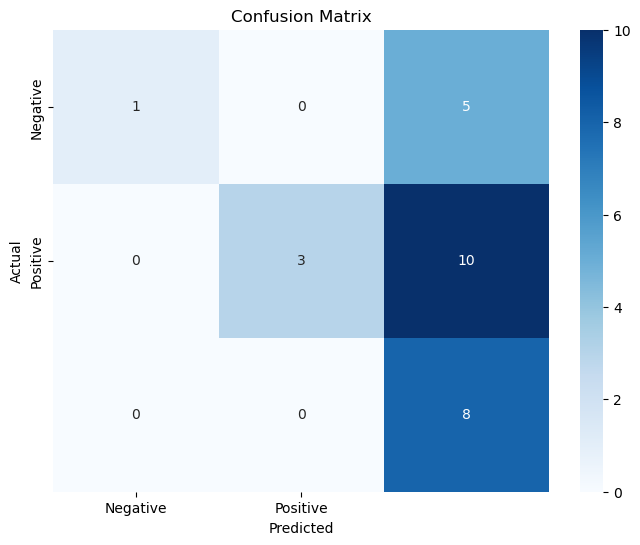

In [23]:
# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# print the classification report
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'Accuracy: {svm_accuracy}\n')
print(classification_report(y_test, svm_predictions))

Accuracy: 0.4444444444444444

              precision    recall  f1-score   support

    Negative       1.00      0.17      0.29         6
     Neutral       1.00      0.23      0.38        13
    Positive       0.35      1.00      0.52         8

    accuracy                           0.44        27
   macro avg       0.78      0.47      0.39        27
weighted avg       0.81      0.44      0.40        27



In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset splitting
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn_model.fit(X_train_tfidf, y_train)

# Evaluate the model
knn_predictions = knn_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, knn_predictions)
print(f'KNN Model Accuracy: {accuracy}')

# Make predictions
print(classification_report(y_test, knn_predictions))

KNN Model Accuracy: 0.4074074074074074
              precision    recall  f1-score   support

    Negative       0.40      0.33      0.36         6
     Neutral       0.50      0.31      0.38        13
    Positive       0.36      0.62      0.45         8

    accuracy                           0.41        27
   macro avg       0.42      0.42      0.40        27
weighted avg       0.44      0.41      0.40        27



In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset splitting
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_model.fit(X_train_tfidf, y_train)

# Evaluate the model
rf_predictions = rf_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Model Accuracy: {accuracy}')

# Make predictions
print(classification_report(y_test, rf_predictions))

Random Forest Model Accuracy: 0.48148148148148145
              precision    recall  f1-score   support

    Negative       0.50      0.17      0.25         6
     Neutral       1.00      0.38      0.56        13
    Positive       0.35      0.88      0.50         8

    accuracy                           0.48        27
   macro avg       0.62      0.48      0.44        27
weighted avg       0.70      0.48      0.47        27



In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset splitting
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build and train Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_tfidf, y_train)

# Evaluate the model
logreg_predictions = logreg_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, logreg_predictions)
print(f'Logistic Regression Model Accuracy: {accuracy}')

# Make predictions
print(classification_report(y_test, logreg_predictions))

Logistic Regression Model Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         6
     Neutral       1.00      0.08      0.14        13
    Positive       0.31      1.00      0.47         8

    accuracy                           0.33        27
   macro avg       0.44      0.36      0.20        27
weighted avg       0.57      0.33      0.21        27



C:\Users\Chan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
